#### Reference: https://github.com/zziz/kalman-filter 

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use('ggplot')

Notations follow those in the Wikipedia page: https://en.wikipedia.org/wiki/Kalman_filter 

In [50]:
class KalmanFilter(object):
    
    def __init__(self, F=None, B=None, H=None, Q=None, R=None, P=None, x0=None):
        
        if F is None or H is None:
            raise ValueError("Set proper system dynamics.")
        
        self.n = F.shape[1] # dimension of the hidden state x
        self.m = H.shape[0] # dimension of the observation state z
        
        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q  # process noise
        self.R = np.eye(self.m) if R is None else R  # measurement noise
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0
    
    def predict(self, u=0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(self.F, np.dot(self.P, self.F.T)) + self.Q
        return self.x 
    
    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        
        self.x = self.x + np.dot(K, y)
        
        I = np.eye(self.n)
        self.P = np.dot(I - np.dot(K, self.H), self.P)
        

In [51]:
dt = 1./60
a = 1.0 # acceleration

F = np.array([[1., dt, 0.], [0., 1., dt], [0., 0., 1.]])
B = np.array([[0.5 * dt**2, 0.], [0., dt], [0., 0.]])
u = np.array([a, a]).reshape(2, -1)
H = np.array([1., 0., 0.]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)


In [59]:
n_data_points = 100
x = np.linspace(-20., 20., n_data_points)
observations = - (x**2 + 2 * x - 2.) + np.random.normal(0, 1., n_data_points)

In [60]:
predictions = []
kf = KalmanFilter(F=F, B=B, H=H, Q=Q, R=R)
for obs in observations:
    predictions.append(np.dot(H, kf.predict(u=u))[0])
    kf.update(obs)

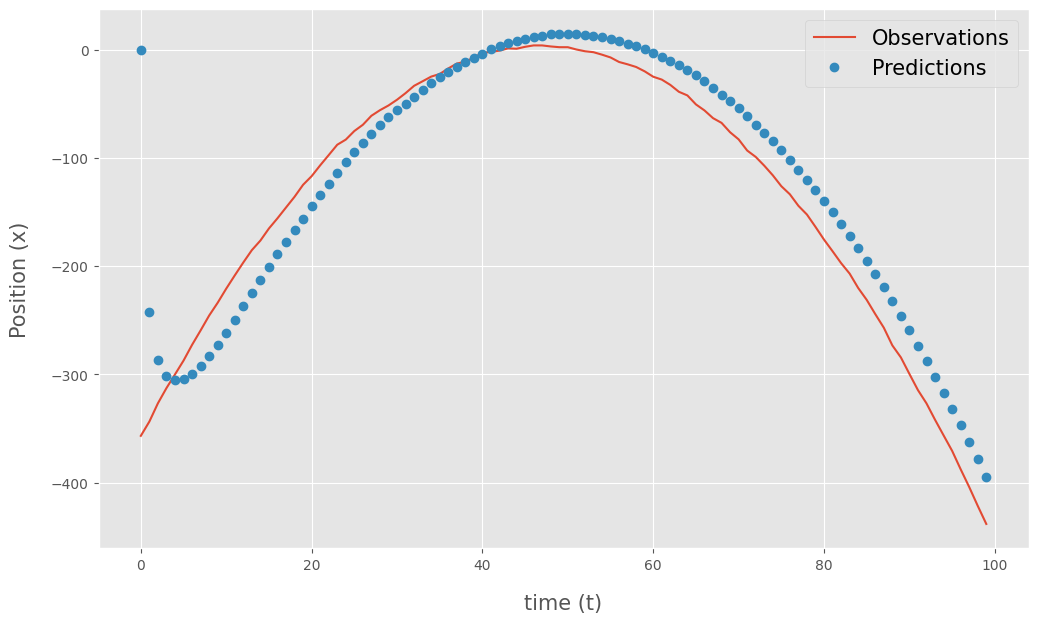

In [61]:
fontsize = 15
fig, ax = plt.subplots(1, figsize=(12, 7))
ax.plot(range(len(observations)), observations, label='Observations')
ax.plot(range(len(predictions)), np.array(predictions), label='Predictions', marker='o', lw=0)
ax.set_xlabel('time (t)', fontsize=fontsize, labelpad=15)
ax.set_ylabel('Position (x)', fontsize=fontsize, labelpad=15)
ax.legend(loc='best', fontsize=fontsize)